### 模型的泛化能力

泛化能力: 将已有数据的模型,推广到其他数据的,还能够精准预测的能力.

我们训练模型,不是为了可以拟合已有数据,而是为了可以预测其他数据.

### 模型复杂度曲线
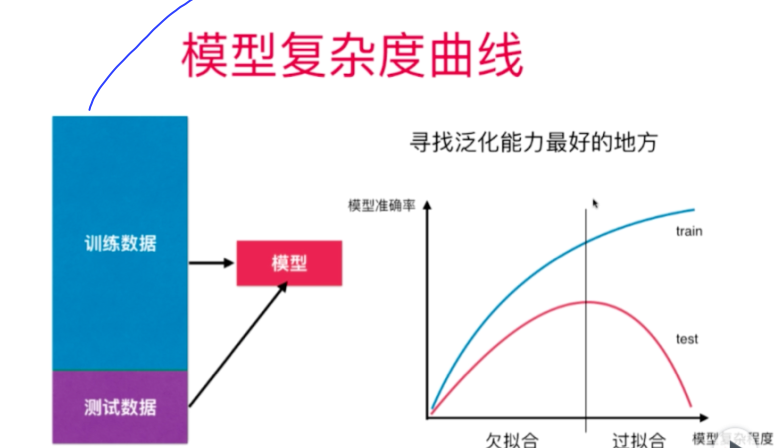

### 过拟合和欠拟合

- 欠拟合:算法所训练的模型,不能完全表述数据关系
- 过拟合:算法训练的模型,过多的表述了噪音之间的关系

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size =100)
X = x.reshape(-1,1)
y = 0.5 * x **2 + x + 2 +np.random.normal(0,1,size=100)

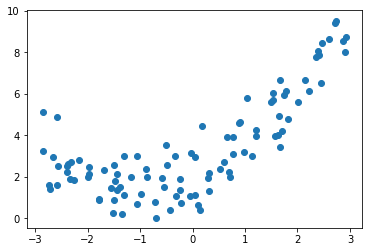

In [3]:
plt.scatter(X,y)
plt.show()

### 欠拟合 

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X,y)
lin_reg1.score(X,y)

0.53677468445558285

In [6]:
y_predict = lin_reg1.predict(X)

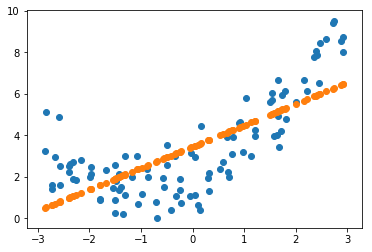

In [7]:
plt.scatter(X,y)
plt.scatter(X,y_predict)
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
## 使用欠拟合的MSE
mean_squared_error(y,y_predict)

2.5768542773141592

### 探讨过拟合

In [10]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(2)

In [11]:
ploy.fit(X)
X2 = ploy.transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y2_predict = lin_reg2.predict(X2)

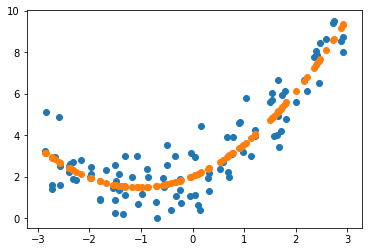

In [12]:
plt.scatter(X,y)
plt.scatter(X,y2_predict)
plt.show()

In [13]:
mean_squared_error(y,y2_predict)

0.89717503264658749

mse相对一维线性回归更小.

## 使用多项式回归

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def PloynomialRegression(degree):
    return Pipeline([
        ('ploy',PolynomialFeatures(degree = degree)),
        ('std_scalar',StandardScaler()),
        ('reg_lin',LinearRegression())
    ])

In [15]:
ploy2_reg  = PloynomialRegression(degree = 10)
ploy2_reg.fit(X,y)
y_predict2 = ploy2_reg.predict(X)

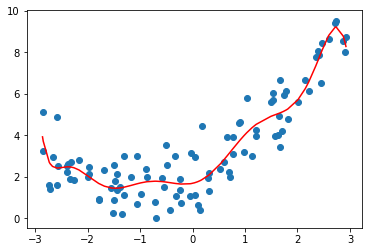

In [16]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],c = 'r')
plt.show()

In [17]:
mean_squared_error(y,y_predict2)

0.80205835158125272

In [18]:
ploy2_reg  = PloynomialRegression(degree = 100)
ploy2_reg.fit(X,y)
y_predict3 = ploy2_reg.predict(X)

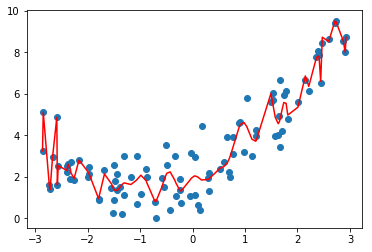

In [19]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict3[np.argsort(x)],c = 'r')
plt.show()

In [20]:
mean_squared_error(y,y_predict3)

0.54399887587610674

### 观察100维数据的曲线

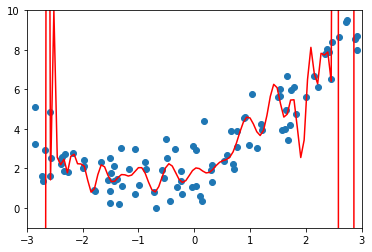

In [25]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = ploy2_reg.predict(X_plot)
plt.plot(X_plot[:,0],y_plot,c = 'r')
plt.scatter(X,y)
plt.axis([-3,3,-1,10])
plt.show()